In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/000001.SS.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,2716.697998,2766.576904,2716.697998,2746.605957,2746.605957,215900
1,2020-02-04,2685.269043,2786.164063,2685.269043,2783.288086,2783.288086,364000
2,2020-02-05,2792.371094,2842.742920,2778.864014,2818.087891,2818.087891,309800
3,2020-02-06,2826.889893,2876.590088,2807.610107,2866.510010,2866.510010,316400
4,2020-02-07,2858.929932,2875.959961,2838.770020,2875.959961,2875.959961,309500


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
696,2022-12-09,3197.120117,3212.110107,3182.909912,3206.949951,3206.949951,373300
697,2022-12-12,3195.870117,3196.719971,3176.580078,3179.040039,3179.040039,333400
698,2022-12-13,3179.439941,3187.199951,3171.479980,3176.330078,3176.330078,285800
699,2022-12-14,3178.550049,3189.840088,3168.590088,3176.530029,3176.530029,265600
700,2022-12-15,3177.199951,3179.100098,3158.449951,3168.649902,3168.649902,243000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,3303.647067,3325.612462,3281.912509,3306.333245,3306.333245,324982.596291
std,245.502841,243.840358,244.547182,244.202631,244.202631,84313.496358
min,2677.590088,2703.330078,2646.804932,2660.169922,2660.169922,100.000000
25%,3141.959961,3158.570068,3115.350098,3149.060059,3149.060059,268200.000000
50%,3351.790039,3373.560059,3329.489990,3355.366943,3355.366943,320300.000000
75%,3509.489990,3531.725098,3490.139893,3510.959961,3510.959961,372700.000000
max,3721.086914,3731.687012,3692.820068,3715.370117,3715.370117,667300.000000


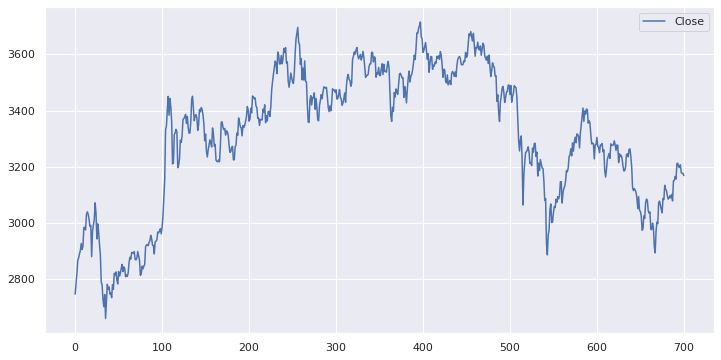

In [6]:
df[['Close']].plot(figsize=(12,6));


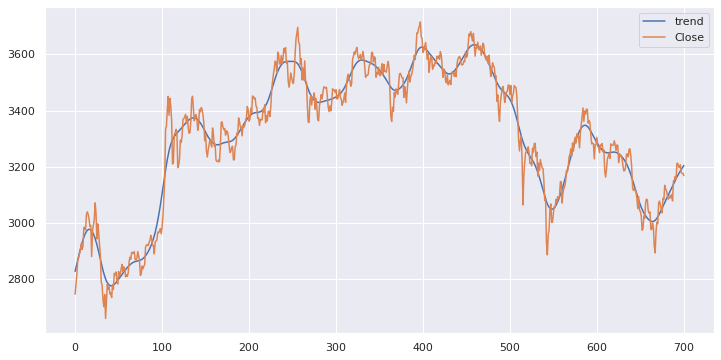

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-2.5662199165093167,
 0.10018182000963805,
 0,
 700,
 {'1%': -3.4397263458688045,
  '5%': -2.8656777575510204,
  '10%': -2.5689734469387755},
 6766.167834633959)

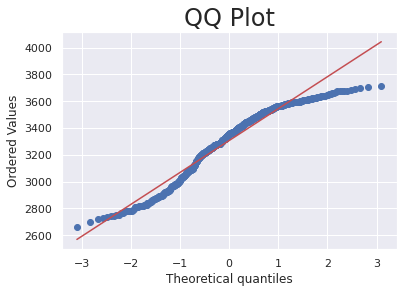

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


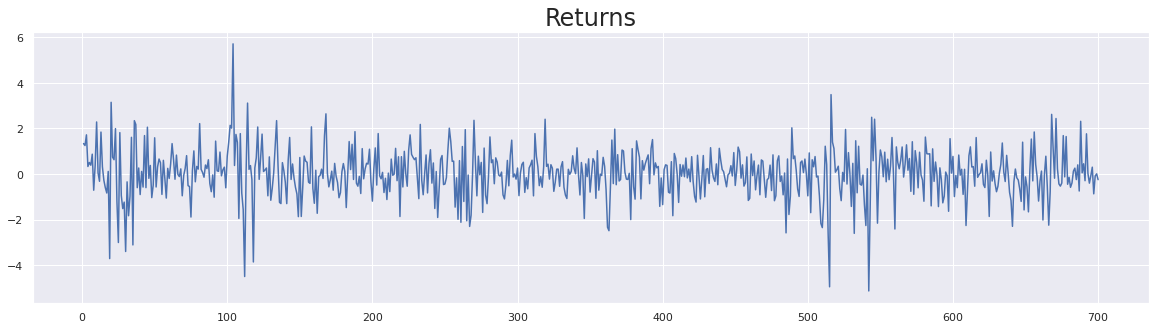

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


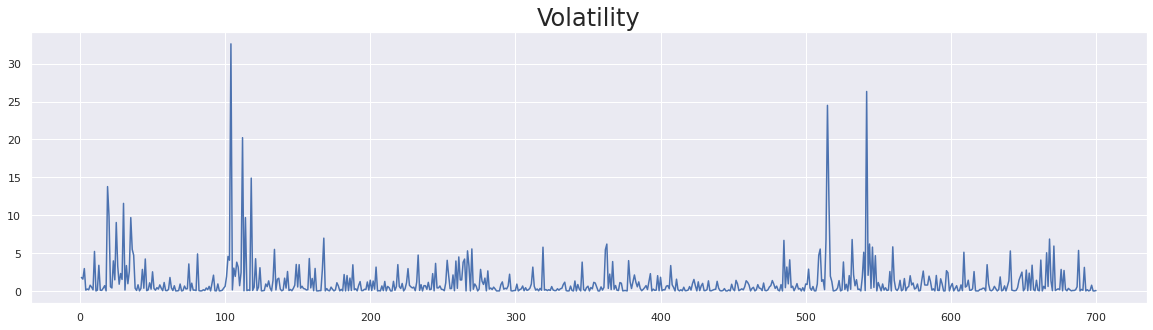

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

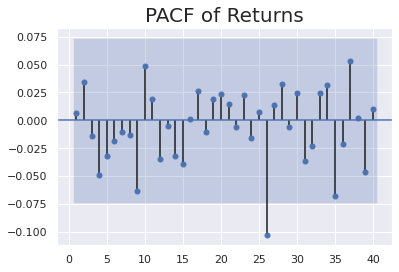

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

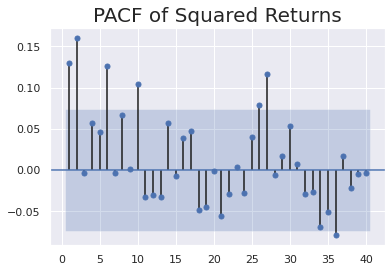

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.8 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1244.0524333544836
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1042.6105742356615
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1042.0717936911692
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1042.0151485739505
            Iterations: 3
            Function evaluations: 22
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1042.02
Distribution:                  Normal   AIC:                           2090.03
Method:            Maximum Likelihood   BIC:                           2103.68
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:10   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0250  3.851e-02      0.648      0.517 [-5.053e-02,  0.100]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0055  9.459e-02     10.630  2.170e-26    [  0.820,  1.191]
alpha[1]       0.1500  7.916e-02      1.895  5.808e-02 [-5.133e-03,  0.305]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1023.2855848149987
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1023.2466586459007
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1023.25
Distribution:                  Normal   AIC:                           2054.49
Method:            Maximum Likelihood   BIC:                           2072.70
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:10   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0337  3.596e-02      0.937      0.349 [-3.677e-02,  0.104]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7512  8.165e-02      9.201  3.557e-20    [  0.591,  0.911]
alpha[1]       0.1258  7.020e-02      1.792  7.319e-02 [-1.181e-02,  0.263]
alpha[2]       0.2528  8.669e-02      2.916  3.543e-03  [8.290e-02,  0.423]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1023.8071071625651
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1022.996959033036
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1022.9969523687944
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1023.00
Distribution:                  Normal   AIC:                           2055.99
Method:            Maximum Likelihood   BIC:                           2078.75
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:10   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0324  3.582e-02      0.904      0.366 [-3.781e-02,  0.103]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.7370  8.579e-02      8.591  8.656e-18      [  0.569,  0.905]
alpha[1]       0.1228  6.926e-02      1.773  7.626e-02   [-1.296e-02,  0.259]
alpha[2]       0.2502  8.649e-02      2.893  3.822e-03    [8.066e-02,  0.420]
alpha[3]       0.0172  2.626e-02      0.655      0.512 [-3.426e-02,6.866e-02]
=============================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 1426.18258063538
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1016.8436441787471
Iteration:     15,   Func. Count:    259,   Neg. LLF: 1012.982750157284
Iteration:     20,   Func. Count:    341,   Neg. LLF: 1006.897671160898
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1006.8976303196187
            Iterations: 23
            Function evaluations: 388
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1006.90
Distribution:                  Normal   AIC:                           2043.80
Method:            Maximum Likelihood   BIC:                           2112.06
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:10   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0232  4.652e-02      0.499      0.617 [-6.794e-02,  0.114]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4593      0.954      0.481      0.630      [ -1.411,  2.330]
alpha[1]       0.0902      0.100      0.901      0.368      [ -0.106,  0.287]
alpha[2]       0.1974      0.107      1.843  6.538e-02   [-1.257e-02,  0.407]
alpha[3]       0.0000  4.105e-02      0.000      1.000 [-8.045e-02,8.045e-02]
alpha[4]       0.0304  5.339e-02      0.569      0.569   [-7.425e-02,  0.135]
alpha[5]       0.0000      0.139      0.000      1.000      [ -0.272,  0.272]
alpha[6]       0.1052      0.214      0.492      0.623      [ -0.314,  0.524]
alpha[7]       0.0429      0.240      0.179      0.858      [ -0.428,  0.514]
alpha[8]       0.0152  6.584e-02      0.231      0.817      [ -0.114,  0.144]
alpha[9]       0.0351      0.267      0.132      0.895      [ -0.488,  0.558]
alpha[10]      0.0987  8.599e-02      1.148      0.251   [-6.980e-02,  0.267]
alpha[11]  1.5552e-11      0.135  1.152e-10      1.000      [ -0.265,  0.265]
alpha[12]  6.0621e-13      0.265  2.292e-12      1.000      [ -0.518,  0.518]
alpha[13]  4.1896e-11      1.493  2.806e-11      1.000      [ -2.926,  2.926]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1018.1510581343389
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1017.0952560037849
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1017.0952560035616
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1017.10
Distribution:                  Normal   AIC:                           2042.19
Method:            Maximum Likelihood   BIC:                           2060.39
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0251  3.493e-02      0.719      0.472 [-4.333e-02,9.359e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0756  5.034e-02      1.502      0.133 [-2.305e-02,  0.174]
alpha[1]       0.1027  4.625e-02      2.221  2.634e-02  [1.208e-02,  0.193]
beta[1]        0.8326  7.700e-02     10.814  2.956e-27    [  0.682,  0.984]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1018.1495090715421
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1017.0793670352589
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1017.0793330044378
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1017.08
Distribution:                  Normal   AIC:                           2044.16
Method:            Maximum Likelihood   BIC:                           2066.91
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0249  3.493e-02      0.712      0.477 [-4.361e-02,9.331e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0767  4.915e-02      1.561      0.119 [-1.963e-02,  0.173]
alpha[1]       0.1054  4.602e-02      2.290  2.203e-02  [1.518e-02,  0.196]
beta[1]        0.7920      0.145      5.451  4.995e-08    [  0.507,  1.077]
beta[2]        0.0370      0.128      0.289      0.772    [ -0.214,  0.288]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1129.5717385997327
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1016.218966464499
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1016.191363063926
            Iterations: 14
            Function evaluations: 110
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1016.19
Distribution:                  Normal   AIC:                           2044.38
Method:            Maximum Likelihood   BIC:                           2071.69
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0240  3.601e-02      0.667      0.505 [-4.657e-02,9.460e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0871  6.561e-02      1.328      0.184 [-4.144e-02,  0.216]
alpha[1]       0.1298  8.379e-02      1.549      0.121 [-3.440e-02,  0.294]
beta[1]        0.6099      0.629      0.970      0.332    [ -0.622,  1.842]
beta[2]    7.1509e-14      1.505  4.752e-14      1.000    [ -2.950,  2.950]
beta[3]        0.1854      0.782      0.237      0.813    [ -1.347,  1.718]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1017.1364898300541
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1017.0952574552523
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1017.0952559952492
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1017.10
Distribution:                  Normal   AIC:                           2044.19
Method:            Maximum Likelihood   BIC:                           2066.95
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0251  3.541e-02      0.710      0.478 [-4.428e-02,9.453e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0756  7.269e-02      1.040      0.298 [-6.687e-02,  0.218]
alpha[1]       0.1027  5.801e-02      1.771  7.655e-02 [-1.096e-02,  0.216]
alpha[2]   5.0821e-17  8.152e-02  6.235e-16      1.000    [ -0.160,  0.160]
beta[1]        0.8326      0.117      7.135  9.680e-13    [  0.604,  1.061]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     46,   Neg. LLF: 1017.2029368008612
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1017.095260808877
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1017.0952559946036
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1017.10
Distribution:                  Normal   AIC:                           2046.19
Method:            Maximum Likelihood   BIC:                           2073.50
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0251  3.541e-02      0.710      0.478 [-4.428e-02,9.453e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0756  7.775e-02      0.972      0.331 [-7.678e-02,  0.228]
alpha[1]       0.1027  5.788e-02      1.775  7.591e-02 [-1.071e-02,  0.216]
alpha[2]   2.8127e-12  8.843e-02  3.181e-11      1.000    [ -0.173,  0.173]
alpha[3]       0.0000  6.807e-02      0.000      1.000    [ -0.133,  0.133]
beta[1]        0.8326      0.129      6.477  9.347e-11    [  0.581,  1.085]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1034.9115151090248
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1014.8552971423359
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1014.8552971423359
            Iterations: 11
            Function evaluations: 84
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1014.86
Distribution:                  Normal   AIC:                           2039.71
Method:            Maximum Likelihood   BIC:                           2062.47
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.4282e-04  3.717e-02 -9.224e-03      0.993 [-7.319e-02,7.250e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0175  1.705e-02      1.029      0.304 [-1.588e-02,5.097e-02]
alpha[1]       0.2556  7.618e-02      3.355  7.941e-04      [  0.106,  0.405]
gamma[1]      -0.0804  5.878e-02     -1.367      0.171    [ -0.196,3.482e-02]
beta[1]        0.9029  5.801e-02     15.565  1.250e-54      [  0.789,  1.017]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1014.38
Distribution:                  Normal   AIC:                           2038.76
Method:            Maximum Likelihood   BIC:                           2061.52
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.7306e-03  3.645e-02      0.185      0.854 [-6.471e-02,7.818e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1269      0.126      1.009      0.313    [ -0.120,  0.373]
alpha[1]       0.0729  5.580e-02      1.306      0.192 [-3.651e-02,  0.182]
gamma[1]       0.1168      0.135      0.863      0.388    [ -0.148,  0.382]
beta[1]        0.7604      0.172      4.414  1.016e-05    [  0.423,  1.098]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1021.8888706624043
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1014.9529373209364
Iteration:     15,   Func. Count:    108,   Neg. LLF: 1014.9496911723867
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1014.9496451311034
            Iterations: 15
            Function evaluations: 110
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1014.95
Distribution:                  Normal   AIC:                           2039.90
Method:            Maximum Likelihood   BIC:                           2062.65
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:12   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.8950e-04  7.727e-04     -0.375      0.708 [-1.804e-03,1.225e-03]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1209  7.174e-02      1.685  9.204e-02 [-1.975e-02,  0.261]
alpha[1]       0.0925  4.985e-02      1.855  6.366e-02 [-5.256e-03,  0.190]
gamma[1]       0.1070  7.550e-02      1.417      0.156 [-4.097e-02,  0.255]
beta[1]        0.7769  8.861e-02      8.768  1.825e-18    [  0.603,  0.951]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1021.5718826960532
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1016.781279304776
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1016.781279304776
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1016.78
Distribution:                  Normal   AIC:                           2043.56
Method:            Maximum Likelihood   BIC:                           2066.32
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:12   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0240  3.436e-02      0.700      0.484 [-4.329e-02,9.138e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1253      0.140      0.895      0.371   [ -0.149,  0.400]
phi        4.2932e-14      0.748  5.741e-14      1.000   [ -1.466,  1.466]
d              0.2536  8.848e-02      2.866  4.153e-03 [8.019e-02,  0.427]
beta           0.1230      0.768      0.160      0.873   [ -1.381,  1.627]
==========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1221.4131899402057
Iteration:     10,   Func. Count:     59,   Neg. LLF: 1049.8597286591266
Iteration:     15,   Func. Count:     79,   Neg. LLF: 1042.0151561370835
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1042.0151488262304
            Iterations: 17
            Function evaluations: 87
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1042.02
Distribution:                  Normal   AIC:                           2090.03
Method:            Maximum Likelihood   BIC:                           2103.68
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0249  3.851e-02      0.648      0.517 [-5.054e-02,  0.100]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0055  9.459e-02     10.630  2.161e-26    [  0.820,  1.191]
alpha[1]       0.1500  7.915e-02      1.895  5.807e-02 [-5.130e-03,  0.305]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1044.0085465029101
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1014.1699496682684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1014.1695335760771
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1014.17
Distribution:                  Normal   AIC:                           2040.34
Method:            Maximum Likelihood   BIC:                           2067.65
                                        No. Observations:                  700
Date:                Thu, Jan 26 2023   Df Residuals:                      699
Time:                        02:18:12   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.7973e-03  3.741e-02      0.128      0.898 [-6.852e-02,7.811e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1233  9.496e-02      1.298      0.194 [-6.287e-02,  0.309]
alpha[1]       0.1391  6.740e-02      2.064  3.898e-02  [7.038e-03,  0.271]
gamma[1]       0.2839      0.279      1.018      0.309    [ -0.263,  0.831]
beta[1]        0.7683      0.124      6.188  6.104e-10    [  0.525,  1.012]
delta          1.5537      0.704      2.208  2.726e-02    [  0.174,  2.933]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=50.563080588583695, pvalue=1.048017228555409e-11)

In [46]:
jarque_bera_test.statistic

50.563080588583695

In [47]:
jarque_bera_test.pvalue

1.048017228555409e-11

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1      1.335544
2      1.250313
3      1.718261
4      0.329667
5      0.505156
         ...   
696    0.300244
697   -0.870295
698   -0.085245
699    0.006295
700   -0.248073
Name: returns, Length: 700, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=248.75181316777622, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

248.75181316777622

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

2.892821224416862

coef. asimetria

In [53]:
returns.skew()

-0.287058258474499

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -26.409
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -14.093
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -26.249
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.224
P-value                         0.225
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        701 non-null    object 
 1   Open        701 non-null    float64
 2   High        701 non-null    float64
 3   Low         701 non-null    float64
 4   Close       701 non-null    float64
 5   Adj Close   701 non-null    float64
 6   Volume      701 non-null    int64  
 7   trend       701 non-null    float64
 8   returns     700 non-null    float64
 9   sq_returns  700 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 54.9+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/000001.SS.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,2716.697998,2766.576904,2716.697998,2746.605957,2746.605957,215900
1,2020-02-04,2685.269043,2786.164063,2685.269043,2783.288086,2783.288086,364000
2,2020-02-05,2792.371094,2842.742920,2778.864014,2818.087891,2818.087891,309800
3,2020-02-06,2826.889893,2876.590088,2807.610107,2866.510010,2866.510010,316400
4,2020-02-07,2858.929932,2875.959961,2838.770020,2875.959961,2875.959961,309500
...,...,...,...,...,...,...,...
696,2022-12-09,3197.120117,3212.110107,3182.909912,3206.949951,3206.949951,373300
697,2022-12-12,3195.870117,3196.719971,3176.580078,3179.040039,3179.040039,333400
698,2022-12-13,3179.439941,3187.199951,3171.479980,3176.330078,3176.330078,285800
699,2022-12-14,3178.550049,3189.840088,3168.590088,3176.530029,3176.530029,265600


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-02-03,2746.605957,215900
1,2020-02-04,2783.288086,364000
2,2020-02-05,2818.087891,309800
3,2020-02-06,2866.510010,316400
4,2020-02-07,2875.959961,309500
...,...,...,...
696,2022-12-09,3206.949951,373300
697,2022-12-12,3179.040039,333400
698,2022-12-13,3176.330078,285800
699,2022-12-14,3176.530029,265600


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-02-03,2746.605957,215900,2783.288086
1,2020-02-04,2783.288086,364000,2818.087891
2,2020-02-05,2818.087891,309800,2866.510010
3,2020-02-06,2866.510010,316400,2875.959961
4,2020-02-07,2875.959961,309500,2890.488037
...,...,...,...,...
696,2022-12-09,3206.949951,373300,3179.040039
697,2022-12-12,3179.040039,333400,3176.330078
698,2022-12-13,3176.330078,285800,3176.530029
699,2022-12-14,3176.530029,265600,3168.649902


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-02-03,2746.605957,215900,2783.288086
1,2020-02-04,2783.288086,364000,2818.087891
2,2020-02-05,2818.087891,309800,2866.510010
3,2020-02-06,2866.510010,316400,2875.959961
4,2020-02-07,2875.959961,309500,2890.488037
...,...,...,...,...
695,2022-12-08,3197.350098,321000,3206.949951
696,2022-12-09,3206.949951,373300,3179.040039
697,2022-12-12,3179.040039,333400,3176.330078
698,2022-12-13,3176.330078,285800,3176.530029


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.08191435, 0.32344125, 0.11667754],
       [0.11667754, 0.54541367, 0.14965688],
       [0.14965688, 0.46417866, 0.19554592],
       ...,
       [0.49172671, 0.49955036, 0.48915851],
       [0.48915851, 0.42820743, 0.489348  ],
       [0.489348  , 0.39793165, 0.4818801 ]])

In [73]:
price_volume_target_scaled_df.shape

(700, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((700, 2), (700, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((455, 2), (455, 1))

In [78]:
X_test.shape, y_test.shape

((245, 2), (245, 1))

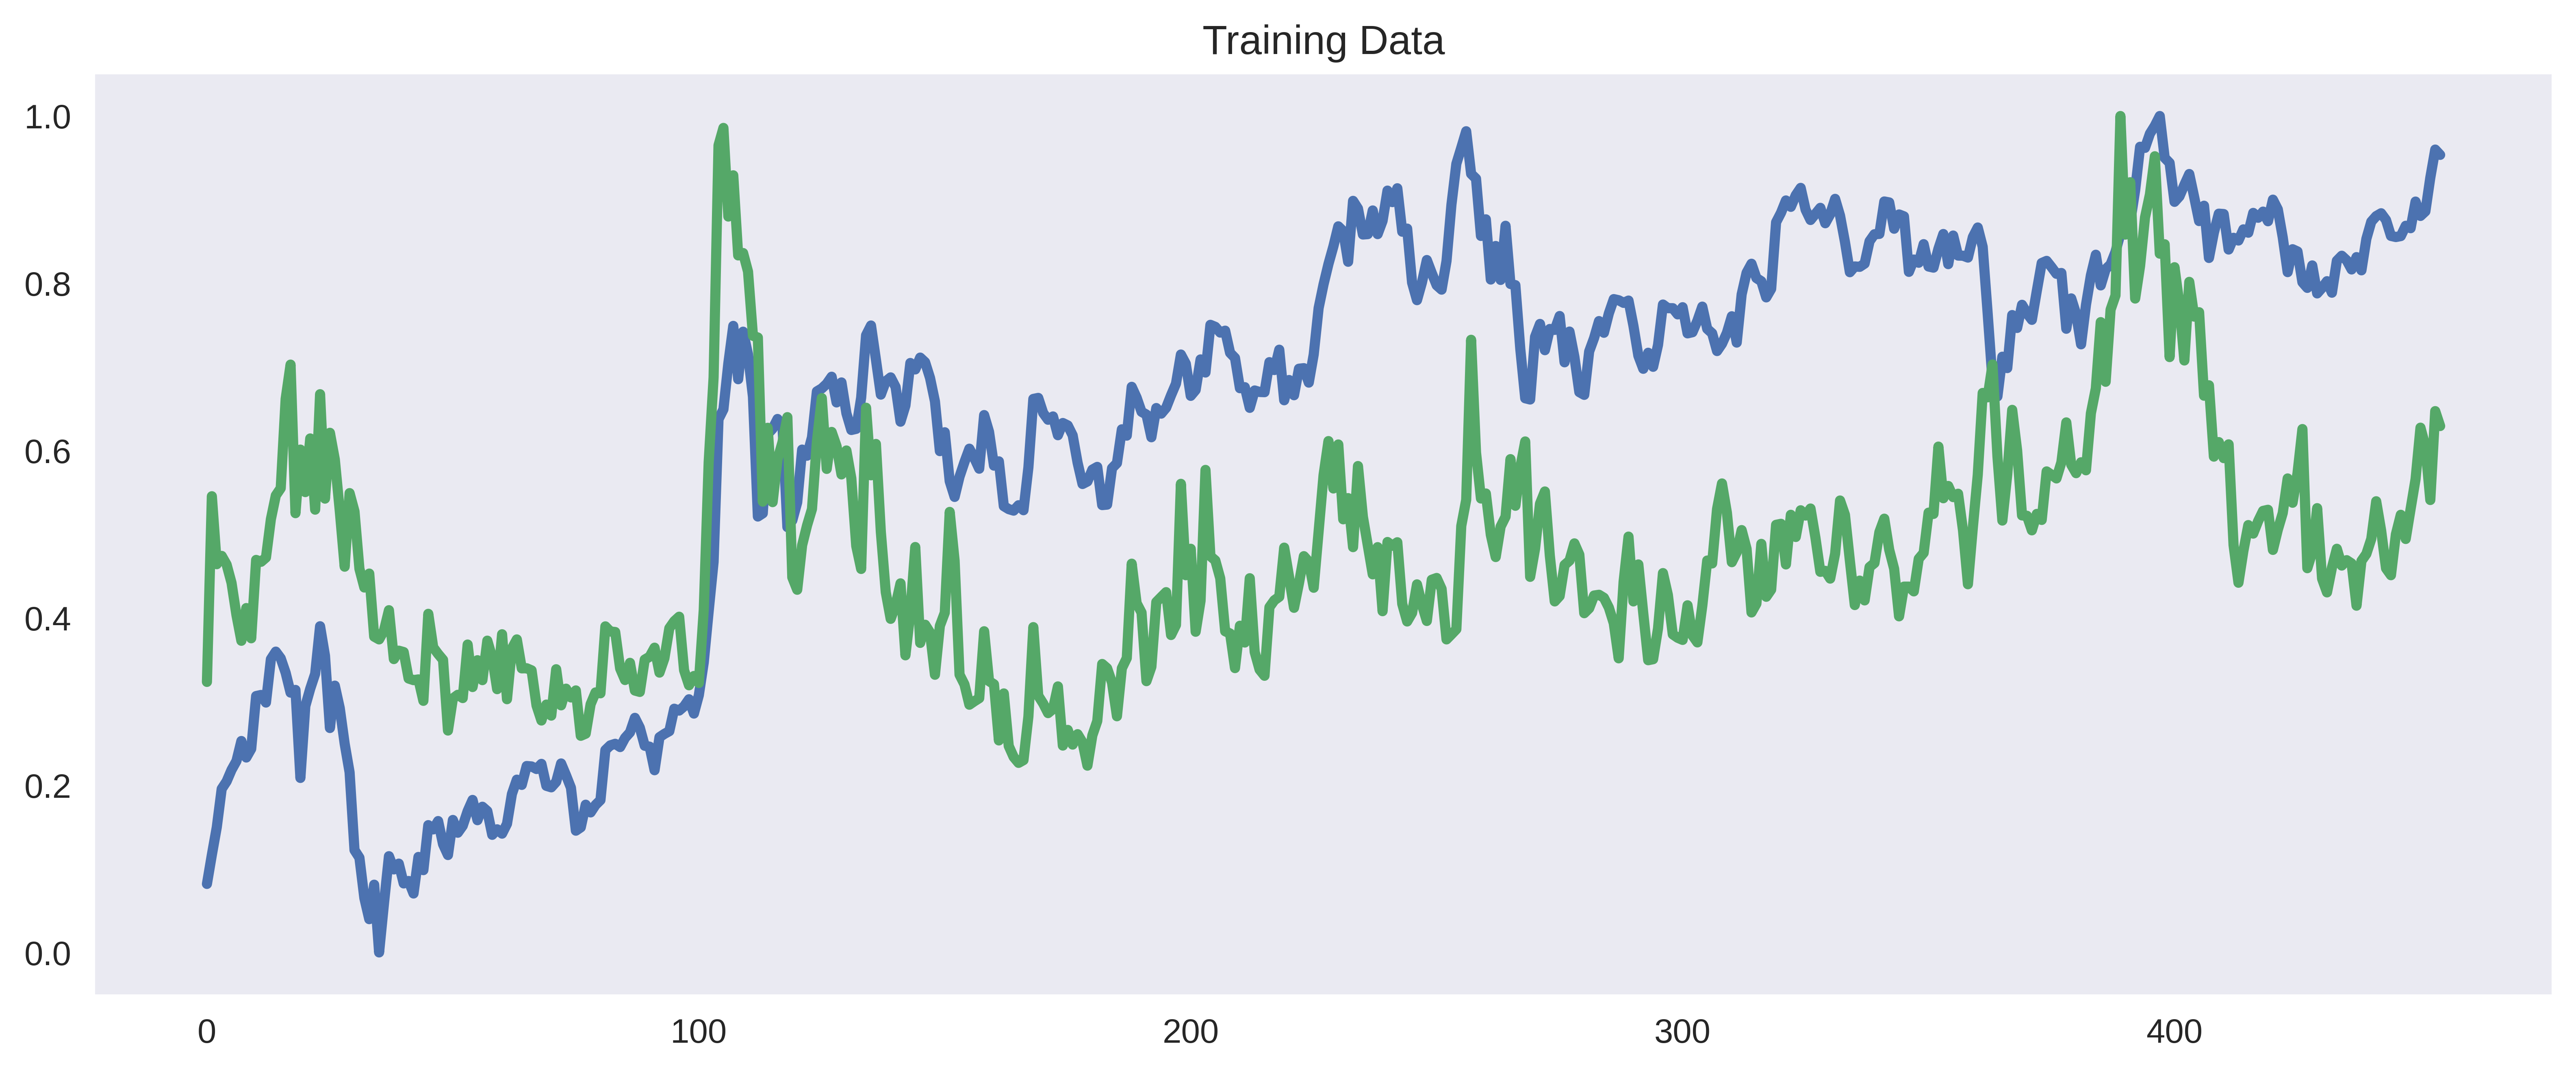

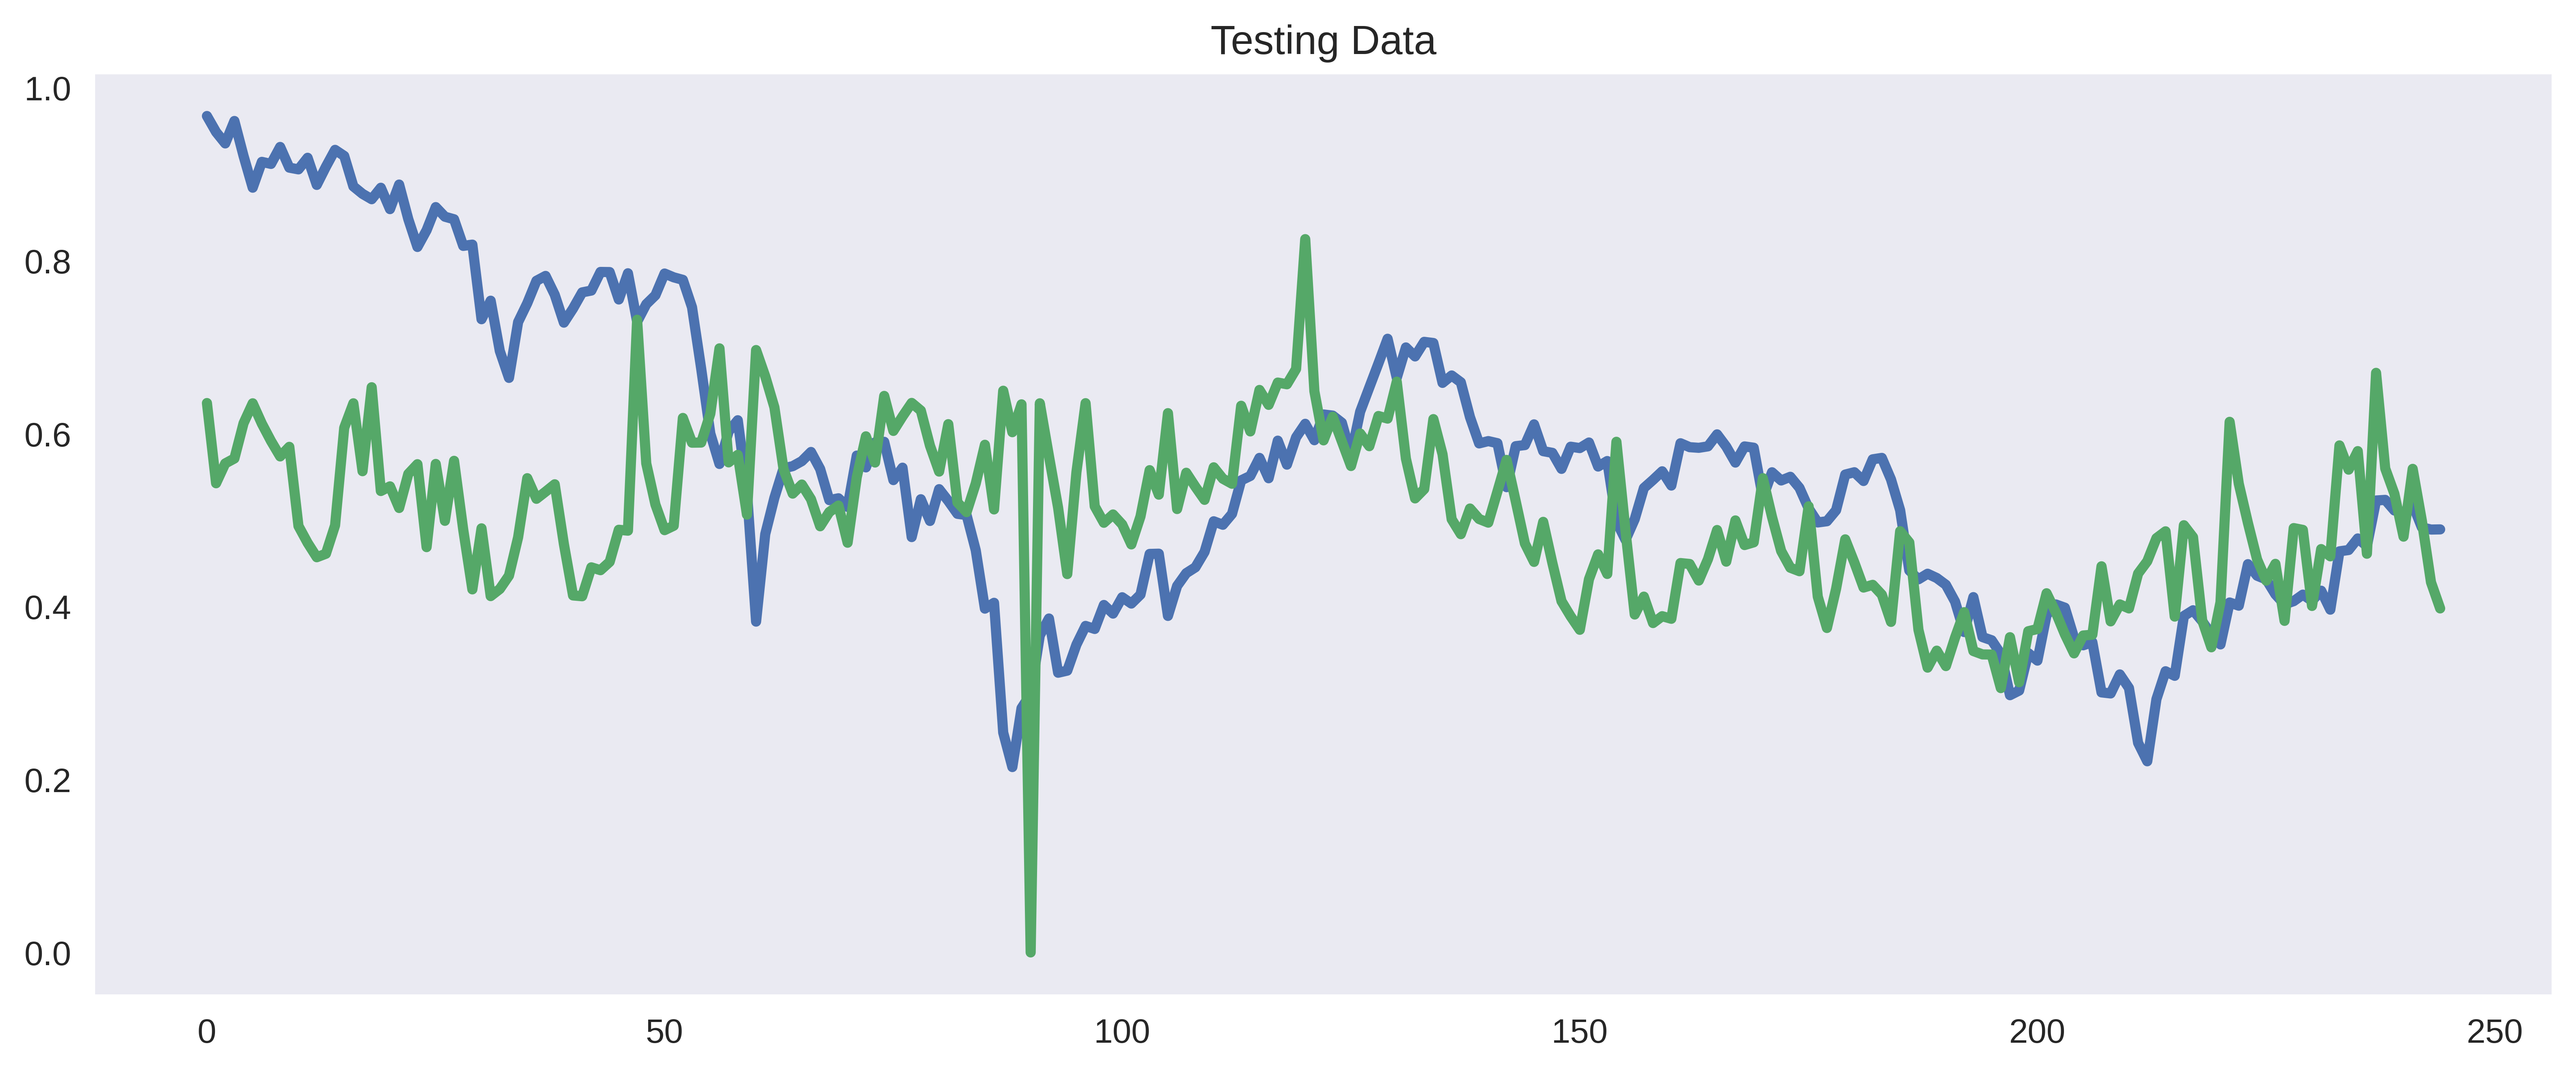

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9591686991296346


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.10806242],
       [0.14751009],
       [0.17641672],
       [0.22022644],
       [0.22841808],
       [0.24083703],
       [0.24976293],
       [0.27154162],
       [0.25396618],
       [0.26273935],
       [0.3253449 ],
       [0.32649251],
       [0.31804004],
       [0.36858875],
       [0.37796733],
       [0.37063887],
       [0.35741092],
       [0.33603105],
       [0.33390436],
       [0.23633364],
       [0.31630479],
       [0.33791975],
       [0.35230445],
       [0.41027011],
       [0.37322208],
       [0.29353156],
       [0.34065865],
       [0.31348789],
       [0.27105943],
       [0.24121783],
       [0.15234278],
       [0.14169952],
       [0.09531312],
       [0.07186745],
       [0.10875352],
       [0.03185799],
       [0.08813848],
       [0.14200858],
       [0.12531072],
       [0.13215773],
       [0.10965011],
       [0.11149699],
       [0.09726277],
       [0.1387373 ],
       [0.12302375],
       [0.17708878],
       [0.17107275],
       [0.180

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

700

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-02-03
1,2020-02-04
2,2020-02-05
3,2020-02-06
4,2020-02-07
...,...
695,2022-12-08
696,2022-12-09
697,2022-12-12
698,2022-12-13


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-02-03,0.081914
1,2020-02-04,0.116678
2,2020-02-05,0.149657
3,2020-02-06,0.195546
4,2020-02-07,0.204502
...,...,...
695,2022-12-08,0.509079
696,2022-12-09,0.518177
697,2022-12-12,0.491727
698,2022-12-13,0.489159


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-02-03,0.081914,0.108062
1,2020-02-04,0.116678,0.147510
2,2020-02-05,0.149657,0.176417
3,2020-02-06,0.195546,0.220226
4,2020-02-07,0.204502,0.228418
...,...,...,...
695,2022-12-08,0.509079,0.517781
696,2022-12-09,0.518177,0.528697
697,2022-12-12,0.491727,0.501867
698,2022-12-13,0.489159,0.497349


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-02-03,2746.605957,215900,2783.288086
1,2020-02-04,2783.288086,364000,2818.087891
2,2020-02-05,2818.087891,309800,2866.510010
3,2020-02-06,2866.510010,316400,2875.959961
4,2020-02-07,2875.959961,309500,2890.488037
...,...,...,...,...
696,2022-12-09,3206.949951,373300,3179.040039
697,2022-12-12,3179.040039,333400,3176.330078
698,2022-12-13,3176.330078,285800,3176.530029
699,2022-12-14,3176.530029,265600,3168.649902


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-02-03,2746.605957,215900,2783.288086
1,2020-02-04,2783.288086,364000,2818.087891
2,2020-02-05,2818.087891,309800,2866.510010
3,2020-02-06,2866.510010,316400,2875.959961
4,2020-02-07,2875.959961,309500,2890.488037
...,...,...,...,...
696,2022-12-09,3206.949951,373300,3179.040039
697,2022-12-12,3179.040039,333400,3176.330078
698,2022-12-13,3176.330078,285800,3176.530029
699,2022-12-14,3176.530029,265600,3168.649902


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[  2746.605957, 215900.      ],
       [  2783.288086, 364000.      ],
       [  2818.087891, 309800.      ],
       ...,
       [  3176.330078, 285800.      ],
       [  3176.530029, 265600.      ],
       [  3168.649902, 243000.      ]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.08191435]),
 array([0.11667754]),
 array([0.14965688]),
 array([0.19554592]),
 array([0.20450152]),
 array([0.21826959]),
 array([0.22886652]),
 array([0.25277573]),
 array([0.23304019]),
 array([0.24340228]),
 array([0.30653155]),
 array([0.30781079]),
 array([0.29874158]),
 array([0.35062932]),
 array([0.35964647]),
 array([0.35165174]),
 array([0.33442007]),
 array([0.31061313]),
 array([0.31383633]),
 array([0.20861826]),
 array([0.29450429]),
 array([0.31532126]),
 array([0.33310844]),
 array([0.3899801]),
 array([0.35475833]),
 array([0.26831031]),
 array([0.31898406]),
 array([0.29221675]),
 array([0.24954143]),
 array([0.21536869]),
 array([0.12233127]),
 array([0.11322135]),
 array([0.06499827]),
 array([0.03976493]),
 array([0.080978]),
 array([0.]),
 array([0.05901067]),
 array([0.11506929]),
 array([0.0992617]),
 array([0.10617223]),
 array([0.08249069]),
 array([0.08541126]),
 array([0.07046251]),
 array([0.11416603]),
 array([0.0983862]),
 array([0.15219199]),
 

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((489, 1, 1), (211, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 10s 141ms/step - loss: 0.3694 - val_loss: 0.5125
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 0.1519 - val_loss: 0.0146
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0398 - val_loss: 0.0253
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0271 - val_loss: 0.0225
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0206 - val_loss: 0.0077
Epoch 6/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0160 - val_loss: 0.0106
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0125 - val_loss: 0.0036
Epoch 8/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0089 - val_loss: 0.0030
Epoch 9/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 10/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 1

In [102]:
# Make prediction
predicted = model.predict(X)

22/22 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.11901665,
 0.14763656,
 0.17516989,
 0.21410131,
 0.2217834,
 0.23364735,
 0.2428231,
 0.26366755,
 0.2464476,
 0.2554722,
 0.31125066,
 0.31239513,
 0.3042937,
 0.35102636,
 0.35924196,
 0.35195655,
 0.33632815,
 0.31490412,
 0.3177933,
 0.22532398,
 0.30051818,
 0.3191256,
 0.33514276,
 0.3870839,
 0.35478488,
 0.27731624,
 0.32241496,
 0.29848257,
 0.26083633,
 0.23114225,
 0.15233025,
 0.14477268,
 0.10523906,
 0.08486839,
 0.11825147,
 0.053205095,
 0.10038572,
 0.14630342,
 0.13324684,
 0.13894422,
 0.119487785,
 0.12187694,
 0.10967886,
 0.14555505,
 0.13252619,
 0.17730176,
 0.1730052,
 0.18140522,
 0.15814945,
 0.147448,
 0.18250716,
 0.16967008,
 0.17664176,
 0.19148925,
 0.20280576,
 0.18229136,
 0.19589728,
 0.19149238,
 0.1675699,
 0.17310563,
 0.1687566,
 0.17864096,
 0.20889163,
 0.22355944,
 0.21817303,
 0.23762417,
 0.23718119,
 0.23452196,
 0.23984843,
 0.21721315,
 0.21568343,
 0.22134206,
 0.24028033,
 0.22812706,
 0.21524912,
 0.1717293,
 0.17507598,
 0.1979636,

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-02-04
2,2020-02-05
3,2020-02-06
4,2020-02-07
5,2020-02-10
...,...
696,2022-12-09
697,2022-12-12
698,2022-12-13
699,2022-12-14


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-02-04,0.119017
2,2020-02-05,0.147637
3,2020-02-06,0.175170
4,2020-02-07,0.214101
5,2020-02-10,0.221783
...,...,...
696,2022-12-09,0.499439
697,2022-12-12,0.508220
698,2022-12-13,0.482769
699,2022-12-14,0.480311


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-02-04,0.119017,0.116678
2,2020-02-05,0.147637,0.149657
3,2020-02-06,0.175170,0.195546
4,2020-02-07,0.214101,0.204502
5,2020-02-10,0.221783,0.218270
...,...,...,...
696,2022-12-09,0.499439,0.518177
697,2022-12-12,0.508220,0.491727
698,2022-12-13,0.482769,0.489159
699,2022-12-14,0.480311,0.489348


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")